In [1]:
# to show an image automatically within the browser without using show()
%matplotlib inline 

import math
import numpy as np # for working with arrays
import pandas as pd # for working with tables
import scipy.stats as stats
import matplotlib.pyplot as plt # for visualization (creating plots)

import statistics as sts # statistic module for variance

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('Train_newColumns.csv')

In [4]:
dfnew = df.drop(columns=['Attrition','JobRole','EducationField','BusinessTravel','Department','EnvironmentSatisfaction','Education' ,'Gender','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','StockOptionLevel', 'WorkLifeBalance' ])

In [5]:
df_1 = dfnew[['MonthlyIncome', 'Stagnation', 'YearsWithCurrManager']]
df_2 = dfnew[['Stagnation', 'YearsAtCompany', 'TotalWorkingYears']]
df_3 = dfnew[['MonthlyIncome', 'TotalWorkingYears', 'Stagnation']]
df_4 = dfnew[['YearsWithCurrManager', 'TotalWorkingYears', 'TrainingTimesLastYear']]
df_5 = dfnew[['MonthlyIncome', 'YearsAtCompany', 'Stagnation']]

data_frames = [df_1, df_2, df_3, df_4, df_5]

In [6]:
#usiamo il MIN-MAX
scaler = StandardScaler()
z_scaled_df = []
#li fittiamo e trasformiamo tutti
for x in data_frames:
  z_scaled_df.append(scaler.fit_transform(x.values))

In [7]:
results = {}
for i, x in enumerate(z_scaled_df):
  results[str(i)] = []

choices_k = []
for k in range(2, 17):
  choices_k.append(k)

for i, x in enumerate(z_scaled_df):
  for k in choices_k:
    results[str(i)].append(KMeans(n_clusters=k, n_init= 10).fit(x))
  print(i)

0
1
2
3
4


In [13]:
print(sse['4'])

{'2': 2041.8263533025017, '3': 1368.7949810394584, '4': 903.1806633620289, '5': 769.3288542565115, '6': 644.5572730709031, '7': 530.7871010497363, '8': 471.69044725701417, '9': 427.6681365778435, '10': 378.250779112318, '11': 340.8777245778897, '12': 315.0522440707706, '13': 288.73515588864865, '14': 271.8435514010539, '15': 257.0744139851757, '16': 239.97273608794214}


In [15]:
print(sse['3'])

{'2': 2077.9296473918507, '3': 1528.3822593747939, '4': 1213.1475338792984, '5': 1053.004920965082, '6': 944.2835983511762, '7': 849.0851152916285, '8': 760.2731222551752, '9': 711.8252092794481, '10': 664.523303906794, '11': 604.6955685315514, '12': 575.9614565892201, '13': 529.5810927541607, '14': 501.8538587461012, '15': 484.09078609801776, '16': 454.1642941225166}


In [16]:
print(sse['2'])

{'2': 2144.4984945819624, '3': 1478.3694625502085, '4': 1016.8365700585441, '5': 827.4486219032381, '6': 705.4080393040773, '7': 621.9909968799403, '8': 557.7803124183577, '9': 514.7200792877534, '10': 467.6258019281867, '11': 438.0438059608546, '12': 395.17754764607963, '13': 360.58342300126833, '14': 330.98020113952714, '15': 315.5332739071688, '16': 294.1922468259541}


In [17]:
print(sse['1'])

{'2': 1879.4637549534348, '3': 1326.2134611165254, '4': 1014.301280048122, '5': 837.7867944804943, '6': 695.4956292122331, '7': 570.580672849708, '8': 517.1063334692415, '9': 447.48140520809676, '10': 410.5175354465223, '11': 381.95999546144185, '12': 355.4816857196908, '13': 331.4848707776554, '14': 308.1887120344283, '15': 290.1793161806803, '16': 279.037581811966}


In [14]:
print(sse['0'])

{'2': 1893.3890570350407, '3': 1236.1418494415743, '4': 917.5641135913191, '5': 785.220353122963, '6': 691.744047689351, '7': 589.7333997646707, '8': 514.3201100023206, '9': 468.5073966739567, '10': 426.40185643500723, '11': 381.7279416983223, '12': 342.4799856895341, '13': 322.57645932553896, '14': 306.5307102189237, '15': 283.98543308311974, '16': 275.00287591537136}


In [27]:
to_plot_idx = 0
to_plot = data_frames[to_plot_idx]
lab = []
for e in to_plot.columns:
  lab.append(e)
x = lab[0]
y = lab[1]
z = lab[2]
k_plot = 10

In [28]:
res = results[str(to_plot_idx)][k_plot-2]
centers = scaler.inverse_transform(res.cluster_centers_)

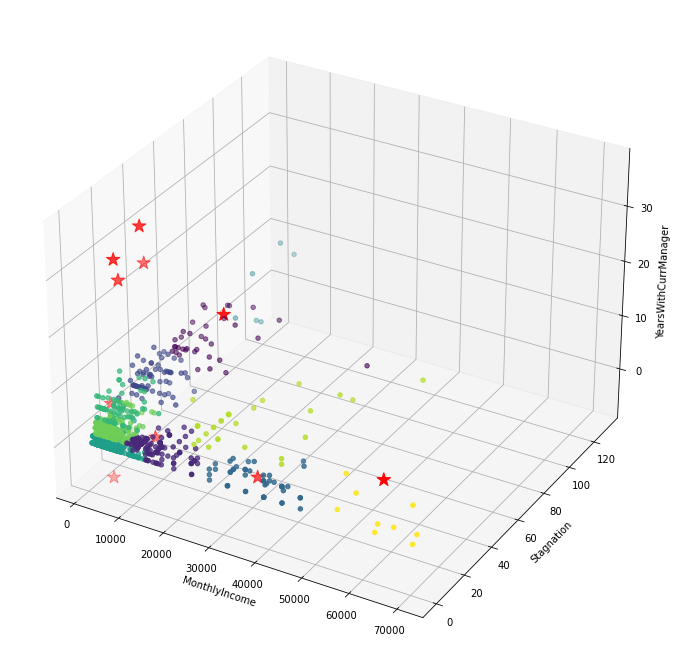

In [29]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(to_plot[x],
           to_plot[y],
           to_plot[z],
           c=results[str(to_plot_idx)][k_plot-2].labels_, marker='o')
ax.scatter(centers[:,0], centers[:,1], centers[:,2], s=200, marker='*', c='r')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()